In [52]:
!pip install scikit-learn


In [22]:
# import required libararies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# load the data and show the first 5 row
df = pd.read_csv("data/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
# explore the data properts
print("Shape",df.shape)
print("columns", df.columns)
print("data types" , df.dtypes)


Shape (1460, 81)
columns Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       

In [12]:
# check missing values
print(df.isnull().sum().sort_values(ascending=False).head(10))


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
dtype: int64


In [15]:
# Visualize Key Features

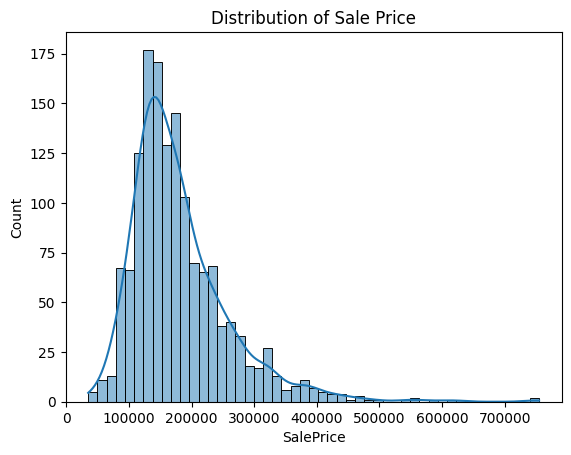

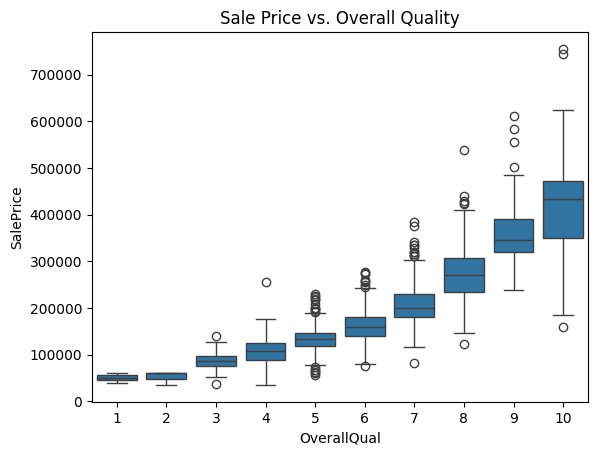

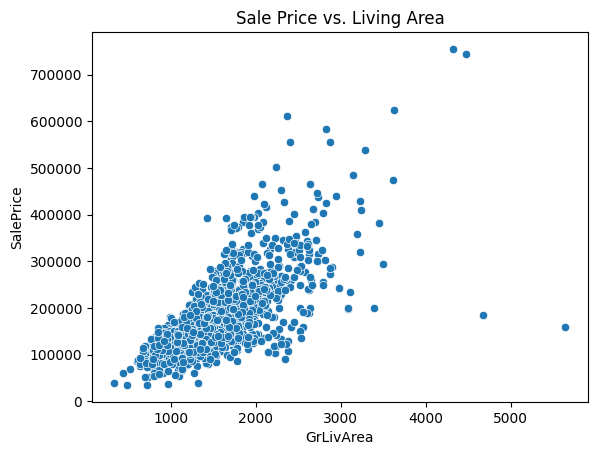

In [20]:
# Target Distribution:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['SalePrice'], kde=True)
plt.title("Distribution of Sale Price")
plt.show()

# SalePrice vs. OverallQual (quality of the house)
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title("Sale Price vs. Overall Quality")
plt.show()

# SalePrice vs. GrLivArea (above ground living area)
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title("Sale Price vs. Living Area")
plt.show()


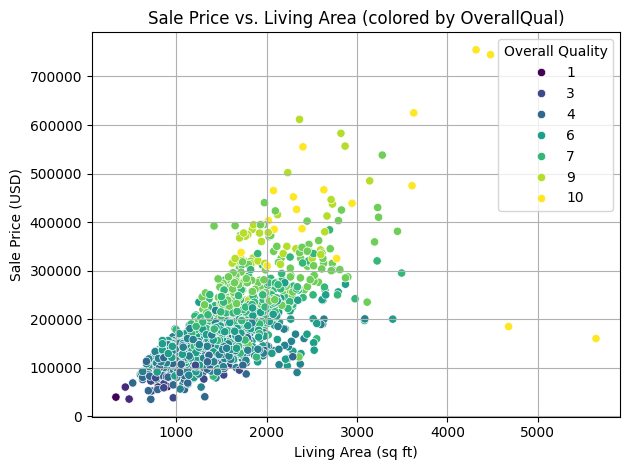

In [23]:
sns.scatterplot(
    x='GrLivArea',
    y='SalePrice',
    hue='OverallQual',         # Color by Overall Quality
    palette='viridis',         # You can try 'coolwarm', 'plasma', etc.
    data=df
)

plt.title("Sale Price vs. Living Area (colored by OverallQual)")
plt.xlabel("Living Area (sq ft)")
plt.ylabel("Sale Price (USD)")
plt.legend(title="Overall Quality")
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
 # Check which columns are most correlated with SalePrice
# Show correlations with SalePrice
correlation = df.corr(numeric_only=True)  # Only numeric columns
saleprice_corr = correlation["SalePrice"].sort_values(ascending=False)

print(saleprice_corr)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

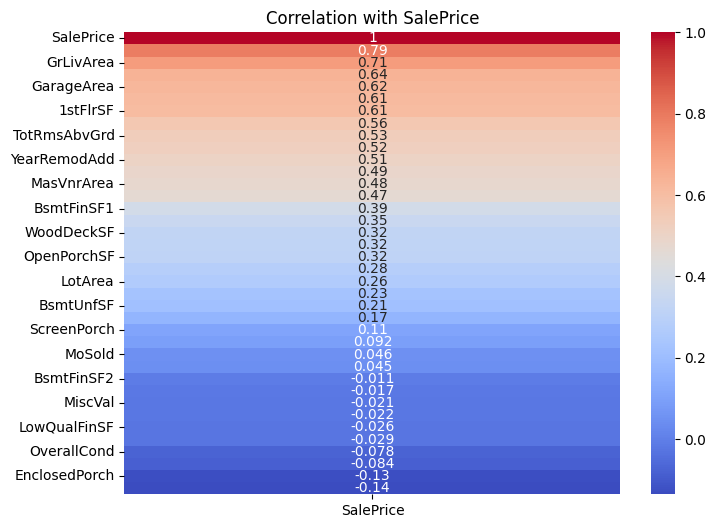

In [25]:
# Correlation matrix of top correlated features
top_corr = df.corr(numeric_only=True)[["SalePrice"]].sort_values(by="SalePrice", ascending=False)

plt.figure(figsize=(8, 6))
sns.heatmap(top_corr, annot=True, cmap="coolwarm")
plt.title("Correlation with SalePrice")
plt.show()

In [ ]:
# Cleaning Plan for Many Columns with Nulls

In [28]:
 # Drop rows with any missing value:
missing = df.isnull().sum().sort_values(ascending=False)
missing

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
Length: 81, dtype: int64

In [36]:
# Show % of missing values for each column
missing_percent = df.isnull().mean() * 100
missing_percent = missing_percent.sort_values(ascending=False)
print(missing_percent[missing_percent == 0])

Condition2       0.0
BldgType         0.0
Neighborhood     0.0
LandSlope        0.0
LotConfig        0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 62, dtype: float64


In [39]:
df = df.drop(columns=missing_percent[missing_percent > 40].index)

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [40]:
print(df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Enclo

In [43]:
 # Fill numeric columns with median:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())


In [44]:
 # Fill object (categorical) columns with mode:
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [46]:
 # Step 4: Confirm that all missing values are cleaned
print("Total missing values:", df.isnull().sum().sum())  # Should print 0


Total missing values: 0


In [47]:
#  Feature Selection & Engineering
# 1. Select relevant features
features = ['GrLivArea', 'OverallQual', 'GarageCars', 'TotalBsmtSF']
X = df[features]
y = df['SalePrice']

In [53]:
# Traing the model
# 1. Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:
# 3. Train a simple model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [56]:
# 4. Evaluate
from sklearn.metrics import mean_squared_error
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 40036.41866406039


In [57]:
# calculate the relative error
relative_error = rmse / y_test.mean()
print("Relative Error:", relative_error)

Relative Error: 0.22386748395706216


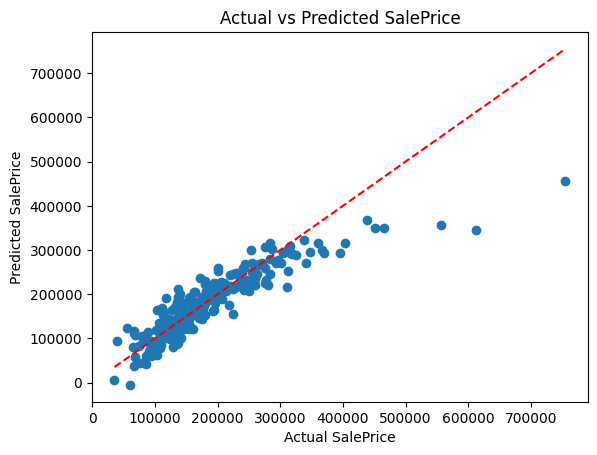

In [58]:
# Visualize Predictions vs Actuals
plt.scatter(y_test, predictions)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted SalePrice")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.show()